In [1]:
#SP500 and Economic Data

In [2]:
# Import intial libaries
import numpy as np
import pandas as pd
from datetime import date
import os
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


Bad key savefig.frameon in file C:\Users\Rodtwo\.conda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Rodtwo\.conda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Rodtwo\.conda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably nee

In [3]:
import json
from dotenv import load_dotenv
import os
import pandas as pd
import quandl
from pathlib import Path
from matplotlib import pyplot as plt 
import requests
import hvplot.pandas
#import plotly.express as px
%matplotlib inline
import seaborn as sns

import pandas_datareader as web
import pandas_datareader as pdr


In [4]:
# Load in fillerfile to add monthly 1st dates

fillerfile = pd.read_csv('fillerfile.csv', index_col = 'Date', parse_dates=True)
fillerfile.index = fillerfile.index.date
fillerfile.head()

,dummyvalue
2013-01-01,5
2013-02-01,5
2013-03-01,5
2013-04-01,5
2013-05-01,5


In [5]:
# Load dotenv enviorment
load_dotenv()

True

In [6]:
# Set Alpaca keys
# alpaca_api_key = os.getenv('ALPACA_API_KEY')
# alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# quandl.ApiConfig.api_key = os.getenv('QUANDL_API_KEY')

In [7]:
# Set Alpaca 
# alpaca = tradeapi.REST(
#     alpaca_api_key,
#     alpaca_secret_key,
#     api_version = "v2"
# )

In [8]:
# Format data/time and timeframe
# start = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
# end = pd.Timestamp("2021-03-30", tz="America/New_York").isoformat()
# timeframe = "1D"

In [9]:
# Set portfolio tickers
# portfolio3 = ["F","GM","GE","CVX","XOM"]

In [10]:
# df_portfolio3_data = pd.DataFrame(quandl.get(['WIKI/F','WIKI/GM','WIKI/GE','WIKI/CVX','WIKI/XOM'], start_date='2013-01-01', end_date='2021-03-01'))

# df_portfolio3_data.tail(5)

In [11]:
df_portfolio3_data = pdr.get_data_yahoo(['F','GM','GE','CVX','XOM'], start='2013-01-01', end='2021-03-30')

df_portfolio3_data.head()

Attributes Adj Close                                              Close  \
Symbols            F         GM         GE        CVX        XOM      F   
Date                                                                      
2013-01-02  9.115022  22.514395  16.762508  78.484093  63.030422  13.20   
2013-01-03  9.294561  23.047691  16.573984  78.149925  62.916748  13.46   
2013-01-04  9.370517  23.078608  16.652531  78.562294  63.208046  13.57   
2013-01-07  9.273845  22.924030  16.597553  78.029053  62.476223  13.43   
2013-01-08  9.218600  22.699888  16.416883  77.680679  62.867039  13.35   

Attributes                                               ...   Open  \
Symbols            GM         GE         CVX        XOM  ...      F   
Date                                                     ...          
2013-01-02  29.129999  20.519232  110.389999  88.709999  ...  13.23   
2013-01-03  29.820000  20.288462  109.919998  88.550003  ...  13.24   
2013-01-04  29.860001  20.384615  110.500000  88.959999  ...  13.51   
2013-01-07  29.660000  20.317308  109.750000  87.930000  ...  13.52   
2013-01-08  29.370001  20.096153  109.260002  88.480003  ...  13.38   

Attributes                                                    Volume  \
Symbols            GM         GE         CVX        XOM            F   
Date                                                                   
2013-01-02  29.410000  20.682692  110.269997  87.790001   75274700.0   
2013-01-03  29.049999  20.653847  110.139999  88.459999  121284700.0   
2013-01-04  29.740000  20.394232  109.989998  88.500000   54669900.0   
2013-01-07  29.639999  20.346153  110.019997  88.309998   43482400.0   
2013-01-08  29.660000  20.288462  109.480003  87.820000   46336200.0   

Attributes                                                 
Symbols             GM          GE        CVX         XOM  
Date                                                       
2013-01-02  15605900.0  47933080.0  6144100.0  16143700.0  
2013-01-03  22903800.0  50449464.0  6817000.0  13268200.0  
2013-01-04   8066600.0  30994704.0  4414500.0  11427900.0  
2013-01-07   8385300.0  34056568.0  4861000.0  11799800.0  
2013-01-08  10435200.0  41647320.0  6325400.0  14226400.0  

[5 rows x 30 columns]

In [12]:
# Get data for portfolio 3

# df_portfolio3_data = alpaca.get_barset(
#     portfolio3,
#     timeframe,
#     start = start,
#     end = end,
#     limit = 1000

# ).df

# df_portfolio3_data.head()

In [13]:
# Isolate the closing price

df_portfolio3 = pd.DataFrame()

df_portfolio3["F"] = df_portfolio3_data["Close"]["F"]
df_portfolio3["GM"] = df_portfolio3_data["Close"]["GM"]
df_portfolio3["GE"] = df_portfolio3_data["Close"]["GE"]
df_portfolio3["CVX"] = df_portfolio3_data["Close"]["CVX"]
df_portfolio3["XOM"] = df_portfolio3_data["Close"]["XOM"]

["F","GM","GE","CVX","XOM"]

df_portfolio3.index = df_portfolio3.index.date
df_portfolio3.head()

,F,GM,GE,CVX,XOM
2013-01-02,13.20,29.129999,20.519232,110.389999,88.709999
2013-01-03,13.46,29.820000,20.288462,109.919998,88.550003
2013-01-04,13.57,29.860001,20.384615,110.500000,88.959999
2013-01-07,13.43,29.660000,20.317308,109.750000,87.930000
2013-01-08,13.35,29.370001,20.096153,109.260002,88.480003


In [14]:
# Obtain first day share price

F_price = float(df_portfolio3.iloc[0:1, 0].values)
GM_price = float(df_portfolio3.iloc[0:1, 1].values)
GE_price = float(df_portfolio3.iloc[0:1, 2].values)
CVX_price = float(df_portfolio3.iloc[0:1, 3].values)
XOM_price = float(df_portfolio3.iloc[0:1, 4].values)

# Calculate number of shares per stock that is purchased with a total investment of $100,000 split evenly ($20,000) amoung the stocks

initial_investment_per_stock = 20000

F_shares = initial_investment_per_stock / F_price
GM_shares = initial_investment_per_stock / GM_price
GE_shares = initial_investment_per_stock / GE_price
CVX_shares = initial_investment_per_stock / CVX_price
XOM_shares = initial_investment_per_stock / XOM_price

# Print initial purchase amounts

print(f"F shares: {F_shares}")
print(f"GM shares: {GM_shares}")
print(f"GE shares: {GE_shares}")
print(f"CVX shares: {CVX_shares}")
print(f"XOM shares: {XOM_shares}")

F shares: 1515.1515370448653
GM shares: 686.5774313834092
GE shares: 974.6953588993927
CVX shares: 181.17583214585517
XOM shares: 225.45372794960042


In [15]:
# Calculate portfolio 3 value based on an initial investment of $100,000

# Calculate the value of each stock
df_portfolio3["F_value"] = round(df_portfolio3["F"] * F_shares, 2)
df_portfolio3["GM_value"] = round(df_portfolio3["GM"] * GM_shares, 2)
df_portfolio3["GE_value"] = round(df_portfolio3["GE"] * GE_shares, 2)
df_portfolio3["CVX_value"] = round(df_portfolio3["CVX"] * CVX_shares, 2)
df_portfolio3["XOM_value"] = round(df_portfolio3["XOM"] * XOM_shares, 2)

#Calculate the value of the total portfolio
df_portfolio3["Portfolio_value"] = df_portfolio3["F_value"] + df_portfolio3["GM_value"] + df_portfolio3["GE_value"] + df_portfolio3["CVX_value"] + df_portfolio3["XOM_value"]

df_portfolio3

,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value
2013-01-02,13.20,29.129999,20.519232,110.389999,88.709999,20000.00,20000.00,20000.00,20000.00,20000.00,100000.00
2013-01-03,13.46,29.820000,20.288462,109.919998,88.550003,20393.94,20473.74,19775.07,19914.85,19963.93,100521.53
2013-01-04,13.57,29.860001,20.384615,110.500000,88.959999,20560.61,20501.20,19868.79,20019.93,20056.36,101006.89
2013-01-07,13.43,29.660000,20.317308,109.750000,87.930000,20348.49,20363.89,19803.19,19884.05,19824.15,100223.77
2013-01-08,13.35,29.370001,20.096153,109.260002,88.480003,20227.27,20164.78,19587.63,19795.27,19948.15,99723.10
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-24,12.14,55.810001,12.500000,104.699997,56.340000,18393.94,38317.89,12183.69,18969.11,12702.06,100566.69
2021-03-25,12.32,56.599998,12.850000,105.070000,56.180000,18666.67,38860.28,12524.84,19036.14,12665.99,101753.92
2021-03-26,12.30,56.520000,12.990000,107.480003,57.709999,18636.36,38805.36,12661.29,19472.78,13010.93,102586.72
2021-03-29,12.15,55.939999,12.950000,106.919998,57.400002,18409.09,38407.14,12622.30,19371.32,12941.04,101750.89


In [16]:
# Add the first of the month dates to portfolio 3

df_portfolio3 = pd.concat([df_portfolio3, fillerfile], axis="columns", join="outer", sort=True)
df_portfolio3.fillna(method='ffill', inplace=True)
df_portfolio3 = df_portfolio3.drop('dummyvalue', 1)
df_portfolio3

,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,13.20,29.129999,20.519232,110.389999,88.709999,20000.00,20000.00,20000.00,20000.00,20000.00,100000.00
2013-01-03,13.46,29.820000,20.288462,109.919998,88.550003,20393.94,20473.74,19775.07,19914.85,19963.93,100521.53
2013-01-04,13.57,29.860001,20.384615,110.500000,88.959999,20560.61,20501.20,19868.79,20019.93,20056.36,101006.89
2013-01-07,13.43,29.660000,20.317308,109.750000,87.930000,20348.49,20363.89,19803.19,19884.05,19824.15,100223.77
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,12.32,56.599998,12.850000,105.070000,56.180000,18666.67,38860.28,12524.84,19036.14,12665.99,101753.92
2021-03-26,12.30,56.520000,12.990000,107.480003,57.709999,18636.36,38805.36,12661.29,19472.78,13010.93,102586.72
2021-03-29,12.15,55.939999,12.950000,106.919998,57.400002,18409.09,38407.14,12622.30,19371.32,12941.04,101750.89
2021-03-30,12.46,58.509998,13.300000,105.930000,56.689999,18878.79,40171.64,12963.45,19191.96,12780.97,103986.81


In [17]:
df_portfolio3['Returns'] = df_portfolio3[["Portfolio_value"]].pct_change() * 100
df_portfolio3 = df_portfolio3.replace(-np.inf, np.nan).dropna()
df_portfolio3.tail()

,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value,Returns
2021-03-25,12.32,56.599998,12.85,105.070000,56.180000,18666.67,38860.28,12524.84,19036.14,12665.99,101753.92,1.180540
2021-03-26,12.30,56.520000,12.99,107.480003,57.709999,18636.36,38805.36,12661.29,19472.78,13010.93,102586.72,0.818445
2021-03-29,12.15,55.939999,12.95,106.919998,57.400002,18409.09,38407.14,12622.30,19371.32,12941.04,101750.89,-0.814755
2021-03-30,12.46,58.509998,13.30,105.930000,56.689999,18878.79,40171.64,12963.45,19191.96,12780.97,103986.81,2.197445
2021-04-01,12.46,58.509998,13.30,105.930000,56.689999,18878.79,40171.64,12963.45,19191.96,12780.97,103986.81,0.000000


In [18]:
# Create a lagged return using the shift function
df_portfolio3['Lagged_Portfolio'] = df_portfolio3.Portfolio_value.shift()
df_portfolio3 = df_portfolio3.dropna()
df_portfolio3.head()

,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value,Returns,Lagged_Portfolio
2013-01-04,13.57,29.860001,20.384615,110.500000,88.959999,20560.61,20501.20,19868.79,20019.93,20056.36,101006.89,0.482842,100521.53
2013-01-07,13.43,29.660000,20.317308,109.750000,87.930000,20348.49,20363.89,19803.19,19884.05,19824.15,100223.77,-0.775313,101006.89
2013-01-08,13.35,29.370001,20.096153,109.260002,88.480003,20227.27,20164.78,19587.63,19795.27,19948.15,99723.10,-0.499552,100223.77
2013-01-09,13.47,29.969999,20.144232,109.540001,88.139999,20409.09,20576.73,19634.49,19846.00,19871.49,100337.80,0.616407,99723.10
2013-01-10,13.83,30.440001,20.355768,110.470001,89.099998,20954.55,20899.42,19840.67,20014.49,20087.93,101797.06,1.454347,100337.80


In [19]:
#Create a train/test split for the data for testing and the rest for training
train_set, test_set= np.split(df_portfolio3, [int(.69 *len(df_portfolio3))])
train_set.tail()

,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value,Returns,Lagged_Portfolio
2018-09-01,9.48,36.049999,12.442308,118.459999,80.169998,14363.64,24751.12,12127.46,21462.09,18074.62,90778.93,0.000000,90778.93
2018-09-04,9.47,35.599998,12.182692,118.870003,80.290001,14348.49,24442.16,11874.41,21536.37,18101.68,90303.11,-0.524152,90778.93
2018-09-05,9.49,35.290001,12.076923,118.919998,81.360001,14378.79,24229.32,11771.32,21545.43,18342.92,90267.78,-0.039124,90303.11
2018-09-06,9.43,34.380001,12.028846,115.230003,80.459999,14287.88,23604.53,11724.46,20876.89,18140.01,88633.77,-1.810181,90267.78
2018-09-07,9.27,33.910000,11.923077,114.599998,81.830002,14045.46,23281.84,11621.37,20762.75,18448.88,88160.30,-0.534187,88633.77


In [20]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train_set["Lagged_Portfolio"].to_frame()
X_test = test_set["Lagged_Portfolio"].to_frame()
y_train = train_set["Portfolio_value"]
y_test = test_set["Portfolio_value"]

In [21]:
X_train

,Lagged_Portfolio
2013-01-04,100521.53
2013-01-07,101006.89
2013-01-08,100223.77
2013-01-09,99723.10
2013-01-10,100337.80
...,...
2018-09-01,90778.93
2018-09-04,90778.93
2018-09-05,90303.11
2018-09-06,90267.78


In [22]:
y_train

2013-01-04    101006.89
2013-01-07    100223.77
2013-01-08     99723.10
2013-01-09    100337.80
2013-01-10    101797.06
                ...    
2018-09-01     90778.93
2018-09-04     90303.11
2018-09-05     90267.78
2018-09-06     88633.77
2018-09-07     88160.30
Name: Portfolio_value, Length: 1455, dtype: float64

### LINEAR REGRESSION

In [23]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [25]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Portfolio Value"] = predictions

In [26]:
Results.head()

,Portfolio_value,Predicted Portfolio Value
2018-09-10,88353.79,88304.012613
2018-09-11,88367.48,88496.025035
2018-09-12,89074.85,88509.610492
2018-09-13,89254.25,89211.578691
2018-09-14,89939.19,89389.608711


<AxesSubplot:title={'center':'Portfolio Value vs Predicted Portfolio Value'}>

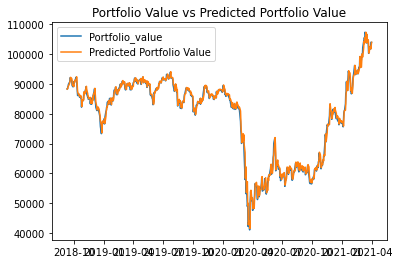

In [27]:
# Plot the first 20 predictions vs the true values
# Results.plot(subplots=True)
Results.plot(title = "Portfolio Value vs Predicted Portfolio Value")

In [28]:
# Out-of-Sample Performance
# Evaluate the model using in-sample data (X_train and y_train)
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results["Portfolio_value"],
    Results["Predicted Portfolio Value"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 1528.2995427760682


In [29]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()
# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Portfolio_value"],
    in_sample_results["In-sample Predictions"]
)
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 1046.2355918680064


array([<AxesSubplot:>], dtype=object)

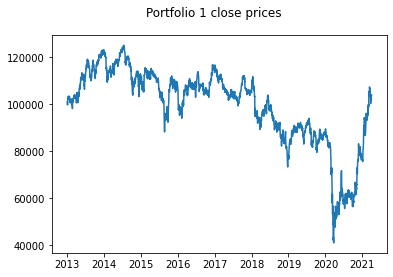

In [30]:
# Plot just the "SPY" column from the dataframe:
df_portfolio3.Portfolio_value.plot(subplots=True, title="Portfolio 1 close prices")

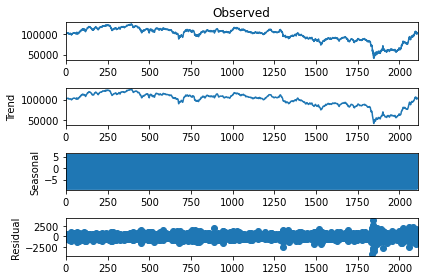

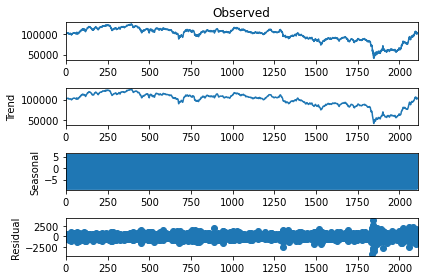

In [31]:
import statsmodels.api as sm
import datetime
# Apply the Hodrick-Prescott Filter by decomposing the "Portfolio Value" price into two separate series:
decomposed = sm.tsa.seasonal_decompose(np.asarray(df_portfolio3['Portfolio_value']), freq=3)
decomposed.plot()

<AxesSubplot:title={'center':'Trend'}>

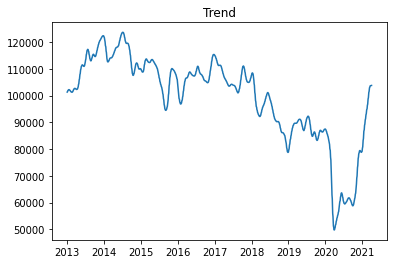

In [32]:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(df_portfolio3['Portfolio_value'])
ts_trend.plot(title='Trend')

<AxesSubplot:title={'center':'Noise'}>

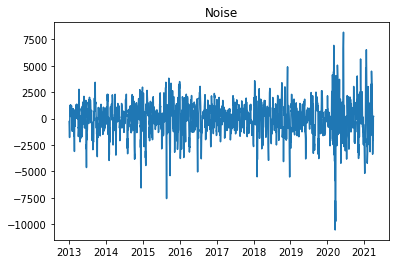

In [33]:
ts_noise.plot(title='Noise')

In [34]:
ts_noise

2013-01-04    -280.947479
2013-01-07   -1177.433805
2013-01-08   -1791.294539
2013-01-09   -1288.698193
2013-01-10      61.576281
                 ...     
2021-03-25   -1974.238262
2021-03-26   -1153.449019
2021-03-29   -2000.714898
2021-03-30     223.365377
2021-04-01     211.393531
Name: Portfolio_value_cycle, Length: 2110, dtype: float64

In [35]:
ts_trend

2013-01-04    101287.837479
2013-01-07    101401.203805
2013-01-08    101514.394539
2013-01-09    101626.498193
2013-01-10    101735.483719
                  ...      
2021-03-25    103728.158262
2021-03-26    103740.169019
2021-03-29    103751.604898
2021-03-30    103763.444623
2021-04-01    103775.416469
Name: Portfolio_value_trend, Length: 2110, dtype: float64

In [36]:
futures_decomp = df_portfolio3[["Portfolio_value"]].copy()
futures_decomp["noise"] = ts_noise
futures_decomp["trend"] = ts_trend
futures_decomp.index = pd.to_datetime(futures_decomp.index)
futures_decomp.head()

,Portfolio_value,noise,trend
2013-01-04,101006.89,-280.947479,101287.837479
2013-01-07,100223.77,-1177.433805,101401.203805
2013-01-08,99723.10,-1791.294539,101514.394539
2013-01-09,100337.80,-1288.698193,101626.498193
2013-01-10,101797.06,61.576281,101735.483719


<Figure size 720x720 with 0 Axes>

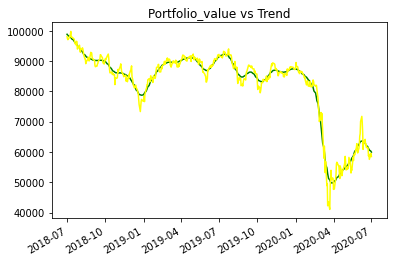

<Figure size 720x720 with 0 Axes>

In [37]:
# # Plot the Portfolio_value vs. the Trend for 2019 to the present
import datetime
startdate = datetime.datetime.strptime('2018-07-01', "%Y-%m-%d")
#print(type(startdate))
enddate = datetime.datetime.strptime('2020-07-01', "%Y-%m-%d")
#print(type(enddate))
futures_decomp["trend"].loc[startdate:enddate].plot(x="Datetime", color='Green', title="Portfolio_value vs Trend")
futures_decomp["Portfolio_value"].loc[startdate:enddate].plot(x="Datetime", color='Yellow', title="Portfolio_value vs Trend")
plt.figure(figsize=(10,10))

array([<AxesSubplot:>], dtype=object)

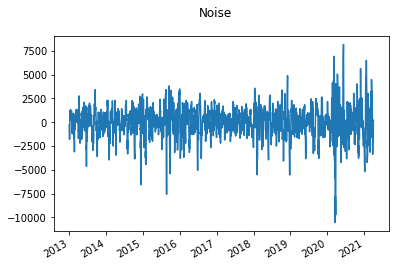

In [38]:
# Plot the SPY Noise
futures_decomp["noise"].plot(subplots=True, title="Noise")

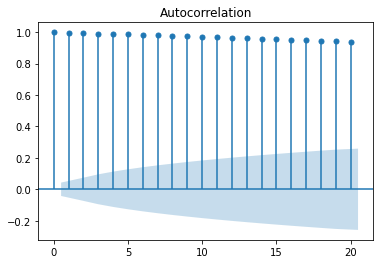

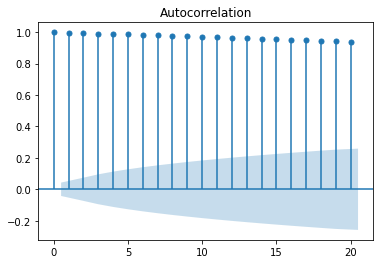

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_portfolio3['Portfolio_value'], lags=20)

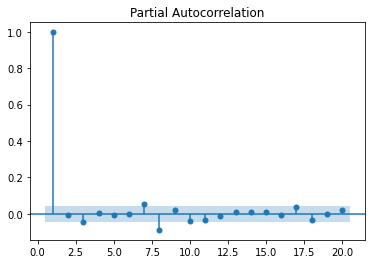

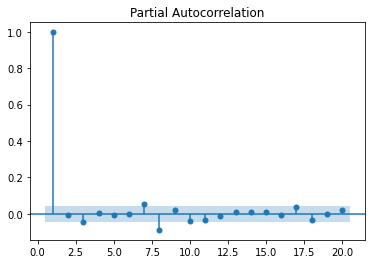

In [40]:
plot_pacf(df_portfolio3['Portfolio_value'], zero=False, lags=20)

### ARIMA MODEL

In [41]:
df_portfolio3.head()

,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value,Returns,Lagged_Portfolio
2013-01-04,13.57,29.860001,20.384615,110.500000,88.959999,20560.61,20501.20,19868.79,20019.93,20056.36,101006.89,0.482842,100521.53
2013-01-07,13.43,29.660000,20.317308,109.750000,87.930000,20348.49,20363.89,19803.19,19884.05,19824.15,100223.77,-0.775313,101006.89
2013-01-08,13.35,29.370001,20.096153,109.260002,88.480003,20227.27,20164.78,19587.63,19795.27,19948.15,99723.10,-0.499552,100223.77
2013-01-09,13.47,29.969999,20.144232,109.540001,88.139999,20409.09,20576.73,19634.49,19846.00,19871.49,100337.80,0.616407,99723.10
2013-01-10,13.83,30.440001,20.355768,110.470001,89.099998,20954.55,20899.42,19840.67,20014.49,20087.93,101797.06,1.454347,100337.80


In [42]:
# Estimate and ARIMA Model:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_portfolio3['Portfolio_value'], order=(3,1,1))

C:\Users\Rodtwo\.conda\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Rodtwo\.conda\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [43]:
# Fit the model
results = model.fit()

In [44]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Portfolio_value   No. Observations:                 2109
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -17967.053
Method:                       css-mle   S.D. of innovations           1212.318
Date:                Sat, 17 Apr 2021   AIC                          35946.106
Time:                        08:42:23   BIC                          35980.030
Sample:                             1   HQIC                         35958.529
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.4178     27.400      0.052      0.959     -52.286      55.122
ar.L1.D.Portfolio_value    -0.0932      1.041     -0.090      0.929      -2.133       1.946
ar.L2.D.Portfolio_value     0.0417      0.022      1.886      0.059      -0.002       0.085
ar.L3.D.Portfolio_value    -0.0053      0.049     -0.107      0.915      -0.101       0.091
ma.L1.D.Portfolio_value     0.0969      1.040      0.093      0.926      -1.942       2.136
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3889           -0.0000j            3.3889           -0.5000
AR.2            5.6566           -4.9028j            7.4857           -0.1137
AR.3            5.6566           +4.9028j            7.4857            0.1137
MA.1          -10.3237           +0.0000j           10.3237            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Portfolio_value Forecast'}>

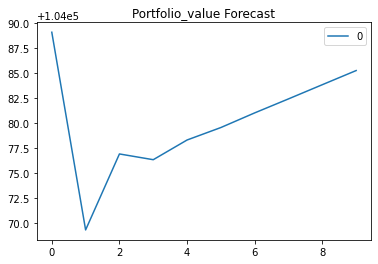

In [45]:
 # Plot the S&P 500 Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Portfolio_value Forecast")

### DEEP LEARNING - LSTM MODEL

In [46]:
df_portfolio3

,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value,Returns,Lagged_Portfolio
2013-01-04,13.57,29.860001,20.384615,110.500000,88.959999,20560.61,20501.20,19868.79,20019.93,20056.36,101006.89,0.482842,100521.53
2013-01-07,13.43,29.660000,20.317308,109.750000,87.930000,20348.49,20363.89,19803.19,19884.05,19824.15,100223.77,-0.775313,101006.89
2013-01-08,13.35,29.370001,20.096153,109.260002,88.480003,20227.27,20164.78,19587.63,19795.27,19948.15,99723.10,-0.499552,100223.77
2013-01-09,13.47,29.969999,20.144232,109.540001,88.139999,20409.09,20576.73,19634.49,19846.00,19871.49,100337.80,0.616407,99723.10
2013-01-10,13.83,30.440001,20.355768,110.470001,89.099998,20954.55,20899.42,19840.67,20014.49,20087.93,101797.06,1.454347,100337.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,12.32,56.599998,12.850000,105.070000,56.180000,18666.67,38860.28,12524.84,19036.14,12665.99,101753.92,1.180540,100566.69
2021-03-26,12.30,56.520000,12.990000,107.480003,57.709999,18636.36,38805.36,12661.29,19472.78,13010.93,102586.72,0.818445,101753.92
2021-03-29,12.15,55.939999,12.950000,106.919998,57.400002,18409.09,38407.14,12622.30,19371.32,12941.04,101750.89,-0.814755,102586.72
2021-03-30,12.46,58.509998,13.300000,105.930000,56.689999,18878.79,40171.64,12963.45,19191.96,12780.97,103986.81,2.197445,101750.89


In [47]:
data = df_portfolio3.filter(['Portfolio_value'])
dataset = data.values
#Lets train the model
train_data_len = math.ceil( len(dataset) * .8 )
train_data_len

1688

In [48]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.71312014],
       [0.70380909],
       [0.69785629],
       ...,
       [0.72196605],
       [0.74855041],
       [0.74855041]])

In [49]:
#create the training data set
train_data = scaled_data[0:train_data_len, :]
#Split the data into x_train & y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.71312014, 0.70380909, 0.69785629, 0.70516487, 0.722515  ,
       0.72856007, 0.73035564, 0.74017271, 0.72829041, 0.73538105,
       0.74261639, 0.73982185, 0.73079925, 0.73635719, 0.74050253,
       0.74067826, 0.73030951, 0.71479563, 0.71226075, 0.72105911,
       0.70818247, 0.72418823, 0.72321221, 0.71486257, 0.71874276,
       0.71715454, 0.72056117, 0.72831942, 0.72227887, 0.71735738,
       0.72593114, 0.70744068, 0.69615119, 0.7078435 , 0.67947426,
       0.69524342, 0.71740303, 0.71211938, 0.71141468, 0.7138328 ,
       0.72627737, 0.73125213, 0.7279531 , 0.73335636, 0.74155477,
       0.73957121, 0.73869875, 0.74726335, 0.74332347, 0.73360271,
       0.73327254, 0.74946615, 0.73986275, 0.74221904, 0.73794316,
       0.74158342, 0.73850899, 0.73130075, 0.72965891, 0.73377571])]
[0.718610548993777]

[array([0.71312014, 0.70380909, 0.69785629, 0.70516487, 0.722515  ,
       0.72856007, 0.73035564, 0.74017271, 0.72829041, 0.73538105,
       0.74261639, 0.73982185, 0.7307

In [50]:
#convert the data set to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [51]:
#Reshape the data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1628, 60, 1)

In [52]:
#Build the LSTM model
model = Sequential()
# Layer 1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# Layer 2
model.add(LSTM(50, return_sequences=False))
# Output layer
model.add(Dense(25))
model.add(Dense(1))

In [53]:
#Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [54]:
# Summarize the model
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [55]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1628/1628 [==============================] - 28s 16ms/step - loss: 0.0090


In [56]:
# Create a testing data set
test_data = scaled_data[train_data_len - 60:, :]
#Create the data x-test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) 

In [57]:
#convert the data to numpy array
x_test = np.array(x_test)

In [58]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.58697439],
        [0.57857457],
        [0.57742163],
        ...,
        [0.56025461],
        [0.56057479],
        [0.58119482]],

       [[0.57857457],
        [0.57742163],
        [0.58094941],
        ...,
        [0.56057479],
        [0.58119482],
        [0.5654001 ]],

       [[0.57742163],
        [0.58094941],
        [0.55898396],
        ...,
        [0.58119482],
        [0.5654001 ],
        [0.5501189 ]],

       ...,

       [[0.42801266],
        [0.42801266],
        [0.41141064],
        ...,
        [0.7078863 ],
        [0.72200208],
        [0.7319038 ]],

       [[0.42801266],
        [0.41141064],
        [0.43691113],
        ...,
        [0.72200208],
        [0.7319038 ],
        [0.72196605]],

       [[0.41141064],
        [0.43691113],
        [0.4669536 ],
        ...,
        [0.7319038 ],
        [0.72196605],
        [0.74855041]]])

In [59]:
# Predit the model price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [60]:
#Get the root mean squared error(RMSE)
rsme = np.sqrt( np.mean( predictions - y_test )**2 )
rsme

3322.0607205272513

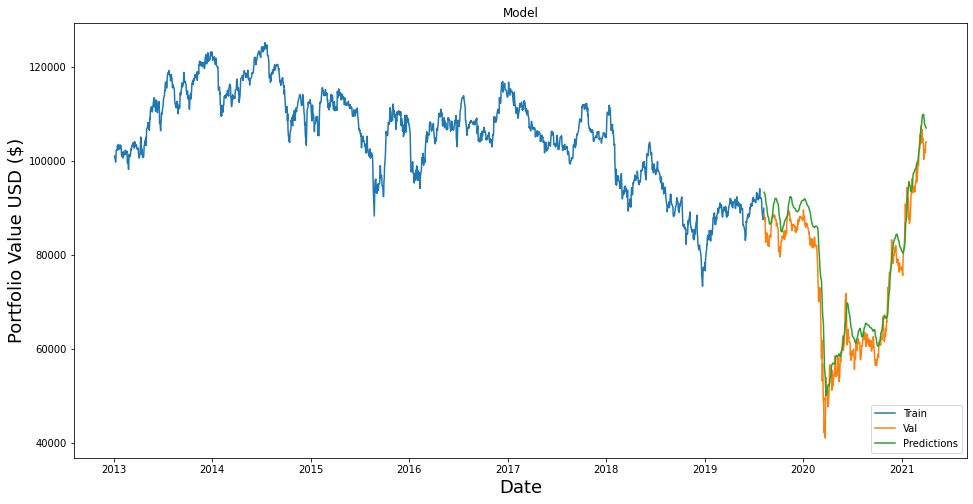

In [61]:
# Plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
#Visulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Portfolio Value USD ($)', fontsize=18)
plt.plot(train['Portfolio_value'])
plt.plot(valid[['Portfolio_value', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [62]:
# Show the valid and predicted prices
valid

,Portfolio_value,Predictions
2019-08-09,88582.66,93320.726562
2019-08-12,87297.41,93041.171875
2019-08-13,87993.42,92696.250000
2019-08-14,84555.26,92412.726562
2019-08-15,82621.30,91863.179688
...,...,...
2021-03-25,101753.92,108492.093750
2021-03-26,102586.72,107871.492188
2021-03-29,101750.89,107435.656250
2021-03-30,103986.81,107060.000000


<AxesSubplot:title={'center':'Portfolio Value vs Predicted Portfolio Value'}>

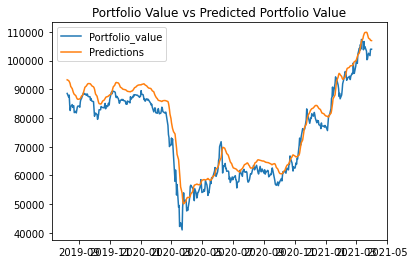

In [63]:
valid.plot(title = "Portfolio Value vs Predicted Portfolio Value")

### INTRODUCING ECONOMIC DATA

In [64]:
#GDP - Quarterly
quandl.ApiConfig.api_key = os.getenv('QUANDL_API_KEY')

df_gdp = pd.DataFrame(quandl.get('FRED/GDP', start_date='2013-01-01', end_date='2021-03-30'))
df_gdp = df_gdp.rename(columns={"Value":"GDP"})
df_gdp.head()

,GDP
Date,
2013-01-01,16569.591
2013-04-01,16637.926
2013-07-01,16848.748
2013-10-01,17083.137
2014-01-01,17104.555


In [65]:
#Consumer Price Index - Monthly
df_cpi = pd.DataFrame(quandl.get('FRED/CPIAUCSL', start_date='2013-01-01', end_date='2021-03-30'))
df_cpi = df_cpi.rename(columns={"Value":"CPI"})
df_cpi.head()

,CPI
Date,
2013-01-01,231.679
2013-02-01,232.937
2013-03-01,232.282
2013-04-01,231.797
2013-05-01,231.893


In [66]:
#Unemployment rate - Monthly
df_un = pd.DataFrame(quandl.get('FRED/UNRATE', start_date='2013-01-01', end_date='2021-03-30'))
df_un = df_un.rename(columns={"Value":"UR"})
df_un.head()

,UR
Date,
2013-01-01,8.0
2013-02-01,7.7
2013-03-01,7.5
2013-04-01,7.6
2013-05-01,7.5


In [67]:
#Industrial Production Index - Monthly
df_ipi = pd.DataFrame(quandl.get('FRED/INDPRO', start_date='2013-01-01', end_date='2021-03-30'))
df_ipi = df_ipi.rename(columns={"Value":"IPI"})
df_ipi.head()

,IPI
Date,
2013-01-01,100.8204
2013-02-01,101.3995
2013-03-01,101.8114
2013-04-01,101.6364
2013-05-01,101.7476


In [68]:
df_economic_indicators = pd.concat([df_gdp, df_cpi, df_un, df_ipi], axis="columns", join="outer")
df_economic_indicators.head(10)

,GDP,CPI,UR,IPI
Date,,,,
2013-01-01,16569.591,231.679,8.0,100.8204
2013-02-01,NaN,232.937,7.7,101.3995
2013-03-01,NaN,232.282,7.5,101.8114
2013-04-01,16637.926,231.797,7.6,101.6364
2013-05-01,NaN,231.893,7.5,101.7476
2013-06-01,NaN,232.445,7.5,101.9549
2013-07-01,16848.748,232.900,7.3,101.5204
2013-08-01,NaN,233.456,7.2,102.1907
2013-09-01,NaN,233.544,7.2,102.7170


In [69]:
df_economic_indicators = df_economic_indicators.fillna(method='ffill')
df_economic_indicators

,GDP,CPI,UR,IPI
Date,,,,
2013-01-01,16569.591,231.679,8.0,100.8204
2013-02-01,16569.591,232.937,7.7,101.3995
2013-03-01,16569.591,232.282,7.5,101.8114
2013-04-01,16637.926,231.797,7.6,101.6364
2013-05-01,16637.926,231.893,7.5,101.7476
...,...,...,...,...
2020-11-01,21494.731,260.927,6.7,104.8319
2020-12-01,21494.731,261.560,6.7,105.8997
2021-01-01,21494.731,262.231,6.3,106.8853


In [70]:
# Scale economic data to combine into one variable for running the model

scalerEco = MinMaxScaler()
scalerEco.fit(df_economic_indicators)
scaled_eco_data = scalerEco.transform(df_economic_indicators)

scaled_eco_data = pd.DataFrame(scaled_eco_data, columns=['GDP','CPI','UR','IPI'])
scaled_eco_data.index = df_economic_indicators.index

scaled_eco_data


,GDP,CPI,UR,IPI
Date,,,,
2013-01-01,0.000000,0.000000,0.398230,0.495422
2013-02-01,0.000000,0.037990,0.371681,0.525449
2013-03-01,0.000000,0.018210,0.353982,0.546806
2013-04-01,0.013198,0.003563,0.362832,0.537732
2013-05-01,0.013198,0.006463,0.353982,0.543498
...,...,...,...,...
2020-11-01,0.951203,0.883252,0.283186,0.703424
2020-12-01,0.951203,0.902368,0.283186,0.758791
2021-01-01,0.951203,0.922631,0.247788,0.809896


In [71]:
# Use scaled data to create create a single column

gdp_weight = .50
cpi_weight = .15
ur_weight = .20
ipi_weight = .15

scaled_eco_data["ECO_DATA"] = (scaled_eco_data["GDP"] * gdp_weight) + (scaled_eco_data["CPI"] * cpi_weight) + (scaled_eco_data["UR"] * ur_weight) + (scaled_eco_data["IPI"] * ipi_weight)

scaled_eco_data




,GDP,CPI,UR,IPI,ECO_DATA
Date,,,,,
2013-01-01,0.000000,0.000000,0.398230,0.495422,0.153959
2013-02-01,0.000000,0.037990,0.371681,0.525449,0.158852
2013-03-01,0.000000,0.018210,0.353982,0.546806,0.155549
2013-04-01,0.013198,0.003563,0.362832,0.537732,0.160360
2013-05-01,0.013198,0.006463,0.353982,0.543498,0.159889
...,...,...,...,...,...
2020-11-01,0.951203,0.883252,0.283186,0.703424,0.770240
2020-12-01,0.951203,0.902368,0.283186,0.758791,0.781412
2021-01-01,0.951203,0.922631,0.247788,0.809896,0.785038


In [72]:
# Add column to economic data

df_economic_indicators["ECO_DATA"] = scaled_eco_data["ECO_DATA"]
df_economic_indicators

,GDP,CPI,UR,IPI,ECO_DATA
Date,,,,,
2013-01-01,16569.591,231.679,8.0,100.8204,0.153959
2013-02-01,16569.591,232.937,7.7,101.3995,0.158852
2013-03-01,16569.591,232.282,7.5,101.8114,0.155549
2013-04-01,16637.926,231.797,7.6,101.6364,0.160360
2013-05-01,16637.926,231.893,7.5,101.7476,0.159889
...,...,...,...,...,...
2020-11-01,21494.731,260.927,6.7,104.8319,0.770240
2020-12-01,21494.731,261.560,6.7,105.8997,0.781412
2021-01-01,21494.731,262.231,6.3,106.8853,0.785038


In [73]:
df_eco_sp = pd.concat([df_economic_indicators, df_portfolio3], axis="columns", join="inner")
df_eco_sp = df_eco_sp.drop(columns=["Returns", "Lagged_Portfolio"])
df_eco_sp.head()

,GDP,CPI,UR,IPI,ECO_DATA,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value
2013-02-01,16569.591,232.937,7.7,101.3995,0.158852,13.02,28.170000,21.750000,116.500000,90.040001,19727.27,19340.89,21199.62,21106.98,20299.85,101674.61
2013-03-01,16569.591,232.282,7.5,101.8114,0.155549,12.61,27.209999,22.298077,116.900002,89.430000,19106.06,18681.77,21733.83,21179.46,20162.33,100863.45
2013-04-01,16637.926,231.797,7.6,101.6364,0.160360,12.90,27.799999,22.192308,119.610001,90.769997,19545.45,19086.85,21630.74,21670.44,20464.43,102397.91
2013-05-01,16637.926,231.893,7.5,101.7476,0.159889,13.38,30.180000,21.298077,120.269997,87.510002,20272.73,20720.91,20759.14,21790.02,19729.46,103272.26
2013-06-01,16637.926,232.445,7.5,101.9549,0.164002,15.68,33.889999,22.423077,122.750000,90.470001,23757.58,23268.11,21855.67,22239.33,20396.80,111517.49


### DEEP LEARNING - SEQUENTIAL MODEL

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow import random

In [75]:
df_2 = df_eco_sp
df_2.head()

,GDP,CPI,UR,IPI,ECO_DATA,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value
2013-02-01,16569.591,232.937,7.7,101.3995,0.158852,13.02,28.170000,21.750000,116.500000,90.040001,19727.27,19340.89,21199.62,21106.98,20299.85,101674.61
2013-03-01,16569.591,232.282,7.5,101.8114,0.155549,12.61,27.209999,22.298077,116.900002,89.430000,19106.06,18681.77,21733.83,21179.46,20162.33,100863.45
2013-04-01,16637.926,231.797,7.6,101.6364,0.160360,12.90,27.799999,22.192308,119.610001,90.769997,19545.45,19086.85,21630.74,21670.44,20464.43,102397.91
2013-05-01,16637.926,231.893,7.5,101.7476,0.159889,13.38,30.180000,21.298077,120.269997,87.510002,20272.73,20720.91,20759.14,21790.02,19729.46,103272.26
2013-06-01,16637.926,232.445,7.5,101.9549,0.164002,15.68,33.889999,22.423077,122.750000,90.470001,23757.58,23268.11,21855.67,22239.33,20396.80,111517.49


In [76]:
df_2_modeldata = pd.DataFrame()
df_2_modeldata['ECO_DATA'] = df_2['ECO_DATA']
df_2_modeldata['Portfolio_value'] = df_2['Portfolio_value']

df_2_modeldata

,ECO_DATA,Portfolio_value
2013-02-01,0.158852,101674.61
2013-03-01,0.155549,100863.45
2013-04-01,0.160360,102397.91
2013-05-01,0.159889,103272.26
2013-06-01,0.164002,111517.49
...,...,...
2020-11-01,0.770240,62597.90
2020-12-01,0.781412,79093.24
2021-01-01,0.785038,77027.47
2021-02-01,0.765691,88025.70


In [77]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df)-window):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [78]:
window_size = 1
feature_column = 0
target_column = 1

X, y = window_data(df_2_modeldata, window_size, feature_column, target_column)


In [79]:
# X = df_2.copy()
# X.drop(["F","GM","GE","CVX","XOM","F_value","GM_value","GE_value","CVX_value","XOM_value","Portfolio_value"], axis = 1, inplace = True)
# X.head()

In [80]:
# y = df_2["Portfolio_value"].values.reshape(-1, 1)
# y[:5]

In [81]:
#Split the data into training and testing
split = int(0.70 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [82]:
# # Scale the X data
# scalerX = MinMaxScaler()
# scalerX.fit(X)
# X_train = scalerX.transform(X_train)
# X_test = scalerX.transform(X_test)

In [83]:
# Scale the y data
scalery = MinMaxScaler()
scalery.fit(y)
y_train = scalery.transform(y_train)
y_test = scalery.transform(y_test)

In [84]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [85]:
# Build the model
model = Sequential()
number_units = 1
dropout_fraction = 0.2
# Layer 1
model.add(LSTM(units = number_units,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units = number_units,return_sequences = True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units = number_units))
model.add(Dropout(dropout_fraction))
# Output Layer
model.add(Dense(1))

In [86]:
# Compile the model
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [87]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 1)              12        
_________________________________________________________________
dropout (Dropout)            (None, 1, 1)              0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 1)              12        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dropout_2 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [88]:
# Train the model
model.fit(X_train, y_train, epochs = 500, shuffle = False, batch_size = 20, verbose = 1)

Epoch 1/500
4/4 [==============================] - 4s 3ms/step - loss: 0.6917
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6841
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6767
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6691
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6623
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6550
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6470
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6399
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6332
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 0.6252
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6179
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6132
Epoch 13/500
4/4 [==============================] - 0s 3ms/st

In [90]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose = 0)

0.1388414353132248

In [91]:
# Make some predictions
predicted = model.predict(X_test)
# Maybe scaleryX originally y
predicted_value = scalery.inverse_transform(predicted)
real_value = scalery.inverse_transform(y_test.reshape(-1, 1))

In [92]:
# Create a DataFrame of Real and Predicted values
portfolio1_value = pd.DataFrame({
    "Real Value": real_value.ravel(),
    "Predicted Value": predicted_value.ravel()
}, index = df_2.index[-len(real_value): ]) 
portfolio1_value

,Real Value,Predicted Value
2018-10-01,90815.63,103047.515625
2018-11-01,86422.35,102963.218750
2018-12-01,86814.86,102947.960938
2019-01-01,76735.40,102945.710938
2019-02-01,87949.96,102881.929688
2019-03-01,90613.90,102901.132812
2019-04-01,90438.08,102879.179688
2019-05-01,91136.12,102813.914062
2019-06-01,83098.08,102806.929688
2019-07-01,92223.41,102810.804688


In [93]:
#Get the root mean squared error(RMSE)
rsme = np.sqrt( np.mean( portfolio1_value['Predicted Value'] - portfolio1_value['Real Value'] )**2 )
rsme

24531.027500000004

<AxesSubplot:title={'center':'Portfolio Value vs Predicted Portfolio Value with Economic Data'}>

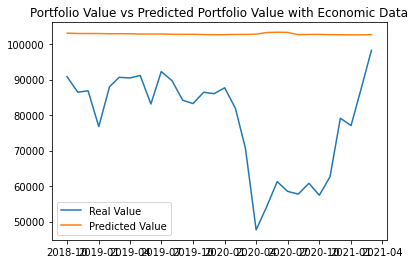

In [94]:
portfolio1_value.plot(title = "Portfolio Value vs Predicted Portfolio Value with Economic Data")

### Trend Analysis

In [95]:
df_2.head()

,GDP,CPI,UR,IPI,ECO_DATA,F,GM,GE,CVX,XOM,F_value,GM_value,GE_value,CVX_value,XOM_value,Portfolio_value
2013-02-01,16569.591,232.937,7.7,101.3995,0.158852,13.02,28.170000,21.750000,116.500000,90.040001,19727.27,19340.89,21199.62,21106.98,20299.85,101674.61
2013-03-01,16569.591,232.282,7.5,101.8114,0.155549,12.61,27.209999,22.298077,116.900002,89.430000,19106.06,18681.77,21733.83,21179.46,20162.33,100863.45
2013-04-01,16637.926,231.797,7.6,101.6364,0.160360,12.90,27.799999,22.192308,119.610001,90.769997,19545.45,19086.85,21630.74,21670.44,20464.43,102397.91
2013-05-01,16637.926,231.893,7.5,101.7476,0.159889,13.38,30.180000,21.298077,120.269997,87.510002,20272.73,20720.91,20759.14,21790.02,19729.46,103272.26
2013-06-01,16637.926,232.445,7.5,101.9549,0.164002,15.68,33.889999,22.423077,122.750000,90.470001,23757.58,23268.11,21855.67,22239.33,20396.80,111517.49


In [96]:
from pytrends.request import TrendReq
import time

In [97]:
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

In [98]:
df_keyword = pd.read_csv("keywords.csv")
keywords = df_keyword['Keywords'].values.tolist()

In [99]:
dataset = []

In [100]:
#for x in range(0,len(keywords)):
keywords_pull = keywords
pytrend.build_payload(kw_list = keywords, cat=12, timeframe = '2013-01-01 2021-03-30', geo='US') # Cat 12 means that these are searches related to business and finance
data = pytrend.interest_over_time()

if not data.empty:
    data = data.drop(labels=['isPartial'], axis='columns')
    dataset.append(data)
    
result = pd.concat(dataset, axis = 1)

result

,ford,general motors,general electric,chevron,exxon mobil
date,,,,,
2013-01-01,52,2,10,23,3
2013-02-01,53,2,10,28,4
2013-03-01,58,3,8,29,4
2013-04-01,56,2,10,29,6
2013-05-01,61,3,9,31,5
...,...,...,...,...,...
2020-11-01,69,3,7,20,4
2020-12-01,70,2,7,20,4
2021-01-01,73,3,8,22,4


In [101]:
# Google trend data is already scaled
# Use Google trend data to create a single column

result["TREND_DATA"] = (result["ford"] * .2) + (result["general motors"] * .2) + (result["general electric"] * .2) + (result["chevron"] * .2) + (result["exxon mobil"] * .2)

result



,ford,general motors,general electric,chevron,exxon mobil,TREND_DATA
date,,,,,,
2013-01-01,52,2,10,23,3,18.0
2013-02-01,53,2,10,28,4,19.4
2013-03-01,58,3,8,29,4,20.4
2013-04-01,56,2,10,29,6,20.6
2013-05-01,61,3,9,31,5,21.8
...,...,...,...,...,...,...
2020-11-01,69,3,7,20,4,20.6
2020-12-01,70,2,7,20,4,20.6
2021-01-01,73,3,8,22,4,22.0


In [102]:
df_3 = pd.concat([df_2, result], axis="columns", join="inner", sort=True)
df_3

,GDP,CPI,UR,IPI,ECO_DATA,F,GM,GE,CVX,XOM,...,GE_value,CVX_value,XOM_value,Portfolio_value,ford,general motors,general electric,chevron,exxon mobil,TREND_DATA
2013-02-01,16569.591,232.937,7.7,101.3995,0.158852,13.02,28.170000,21.750000,116.500000,90.040001,...,21199.62,21106.98,20299.85,101674.61,53,2,10,28,4,19.4
2013-03-01,16569.591,232.282,7.5,101.8114,0.155549,12.61,27.209999,22.298077,116.900002,89.430000,...,21733.83,21179.46,20162.33,100863.45,58,3,8,29,4,20.4
2013-04-01,16637.926,231.797,7.6,101.6364,0.160360,12.90,27.799999,22.192308,119.610001,90.769997,...,21630.74,21670.44,20464.43,102397.91,56,2,10,29,6,20.6
2013-05-01,16637.926,231.893,7.5,101.7476,0.159889,13.38,30.180000,21.298077,120.269997,87.510002,...,20759.14,21790.02,19729.46,103272.26,61,3,9,31,5,21.8
2013-06-01,16637.926,232.445,7.5,101.9549,0.164002,15.68,33.889999,22.423077,122.750000,90.470001,...,21855.67,22239.33,20396.80,111517.49,59,2,11,32,4,21.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,21494.731,260.927,6.7,104.8319,0.770240,7.73,34.529999,7.420000,69.500000,32.619999,...,7232.24,12591.72,7354.30,62597.90,69,3,7,20,4,20.6
2020-12-01,21494.731,261.560,6.7,105.8997,0.781412,9.24,44.680000,10.150000,87.449997,38.500000,...,9893.16,15843.83,8679.97,79093.24,70,2,7,20,4,20.6
2021-01-01,21494.731,262.231,6.3,106.8853,0.785038,8.79,41.639999,10.800000,84.449997,41.220001,...,10526.71,15300.30,9293.20,77027.47,73,3,8,22,4,22.0
2021-02-01,21494.731,263.161,6.2,104.0838,0.765691,10.83,51.509998,10.740000,86.410004,44.919998,...,10468.23,15655.40,10127.38,88025.70,83,4,13,25,5,26.0


In [103]:
df_3_modeldata = pd.DataFrame()
df_3_modeldata['TREND_DATA'] = df_3['TREND_DATA']
df_3_modeldata['Portfolio_value'] = df_3['Portfolio_value']

df_3_modeldata

,TREND_DATA,Portfolio_value
2013-02-01,19.4,101674.61
2013-03-01,20.4,100863.45
2013-04-01,20.6,102397.91
2013-05-01,21.8,103272.26
2013-06-01,21.6,111517.49
...,...,...
2020-11-01,20.6,62597.90
2020-12-01,20.6,79093.24
2021-01-01,22.0,77027.47
2021-02-01,26.0,88025.70


In [104]:
window_size = 1
feature_column = 0
target_column = 1

X, y = window_data(df_3_modeldata, window_size, feature_column, target_column)

In [105]:
#Split the data into training and testing
split = int(0.70 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [106]:
# scalerX = MinMaxScaler()
# scalerX.fit(X)
# X_train = scalerX.transform(X_train)
# X_test = scalerX.transform(X_test)

In [107]:
scalery = MinMaxScaler()
scalery.fit(y)
y_train = scalery.transform(y_train)
y_test = scalery.transform(y_test)

In [108]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [109]:
# Build the model
model = Sequential()
number_units = 1
dropout_fraction = 0.2
# Layer 1
model.add(LSTM(units = number_units,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units = number_units,return_sequences = True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units = number_units))
model.add(Dropout(dropout_fraction))
# Output Layer
model.add(Dense(1))

In [110]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics=["accuracy"])

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 1)              12        
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1)              0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 1)              12        
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 1)              0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dropout_5 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [112]:
model.fit(X_train, y_train, epochs = 500, shuffle = False, batch_size = 20, verbose = 1)

Epoch 1/500
4/4 [==============================] - 4s 3ms/step - loss: 0.6905 - accuracy: 0.0000e+00
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.0000e+00
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.0000e+00
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.0000e+00
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.0000e+00
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.0000e+00
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.0000e+00
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.0000e+00
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 

In [113]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(loss)
print(accuracy)

0.15064387023448944
0.0


In [114]:
predicted = model.predict(X_test)
predicted_value = scalery.inverse_transform(predicted)
#real_value = scalery.inverse_transform(y_test.reshape(-1, 1))

In [115]:
portfolio2_value = pd.DataFrame({
    "Real Value": real_value.ravel(),
    "Predicted Value": predicted_value.ravel()
}, index = df_3_modeldata.index[-len(real_value): ]) 
portfolio2_value

,Real Value,Predicted Value
2018-10-01,90815.63,104163.3125
2018-11-01,86422.35,104163.3125
2018-12-01,86814.86,104163.3125
2019-01-01,76735.40,104163.3125
2019-02-01,87949.96,104163.3125
2019-03-01,90613.90,104163.3125
2019-04-01,90438.08,104163.3125
2019-05-01,91136.12,104163.3125
2019-06-01,83098.08,104163.3125
2019-07-01,92223.41,104163.3125


In [116]:
#Get the root mean squared error(RMSE)
rsme = np.sqrt( np.mean( portfolio2_value['Predicted Value'] - portfolio2_value['Real Value'] )**2 )
rsme

25892.14416666667

<AxesSubplot:title={'center':'Portfolio Value vs Predicted Value with Google Trend Data'}>

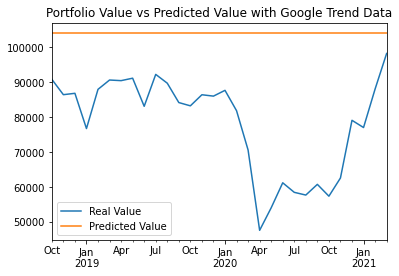

In [117]:
portfolio2_value.plot(title = "Portfolio Value vs Predicted Value with Google Trend Data")

<AxesSubplot:title={'center':'Real vs Predicted Industrial Portfolio Value'}>

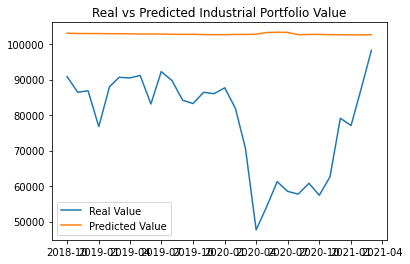

In [118]:
portfolio1_value.plot(title = "Real vs Predicted Industrial Portfolio Value")